# NYC Janurary Tempetures: Prediction Model
### Author: Clayton Seabaugh
[Github Project Repository](https://github.com/ClaytonSeabaughGH/datafun-07-ml)

This project uses Time Seires and Simple Linear Regression to predict the average high temperature in New York City for January using data from 1895 - 2018.\
Data is sourced from NOAA's "Climate at a Galnce" dataset.

In [90]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Part 1 - Chart a Straight Line

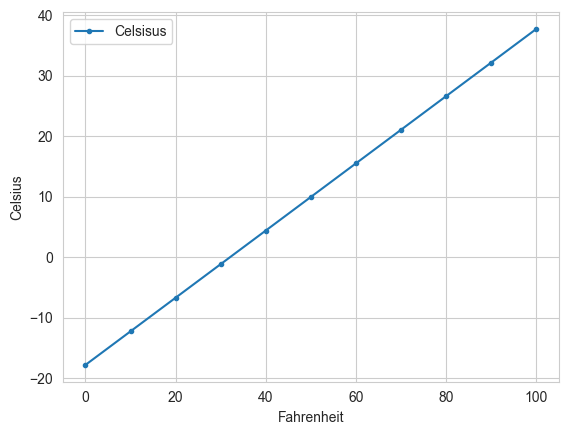

In [91]:
# Formula to convert Fahrenheit to Celsius
c = lambda f: 5 / 9 * (f - 32)
    
# Store each Fahrenheit/Celsius pair as a tuple in temps
temps = [(f, c(f)) for f in range(0, 101, 10)]

# Create DataFrame from list
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsisus'])

# Plot DataFrame into line graph
axes = temps_df.plot(x='Fahrenheit', y='Celsisus', style = '.-')
y_label = axes.set_ylabel('Celsius')


## Part 2 Prediction

### Section 1: Data Acquisition

In [92]:
# Read in NYC Tmeperature data
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Section 2: Data Inspection

In [93]:
# Inspect first 5 rows
nyc.head()


,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [94]:
# Inspect last 5 rows
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3: Data Cleaning

In [95]:
# Change Value column head to Temperature
nyc.columns=['Date','Temperature','Anomaly']

# Inspect the change
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [96]:
# Check data type of date column
nyc.Date.dtype

dtype('int64')

In [97]:
# Truncate to remove last 2 digits
nyc.Date = nyc.Date.floordiv(100)

# Inspect change
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4: Descriptive Statistics

In [98]:
# Set precision to show decimal points .00
pd.set_option('display.precision', 2)

# Calculate basi descriptive statistics
nyc.Temperature.describe()


count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5: Build the Model

In [99]:
# Create linear regression function
linear_regression = stats.linregress(x=nyc.Date,y=nyc.Temperature)

# Calculates line's slope
linear_regression.slope


np.float64(0.014771361132966163)

In [100]:
# Calculates line's intercept
linear_regression.intercept

np.float64(8.694993233674289)

### Section 6: Predict

In [101]:
# Use y = mx+b to predict average temps for 2019
linear_regression.slope * 2019 + linear_regression.intercept

np.float64(38.51837136113297)

In [102]:
# Use y = mx+b to predict average temps for 1890
linear_regression.slope * 1890 + linear_regression.intercept

np.float64(36.612865774980335)

In [103]:
# Use y = mx+b to predict average temps for 2024
linear_regression.slope * 2024 + linear_regression.intercept

np.float64(38.5922281667978)

### Section 7: Visualizations

(10.0, 70.0)

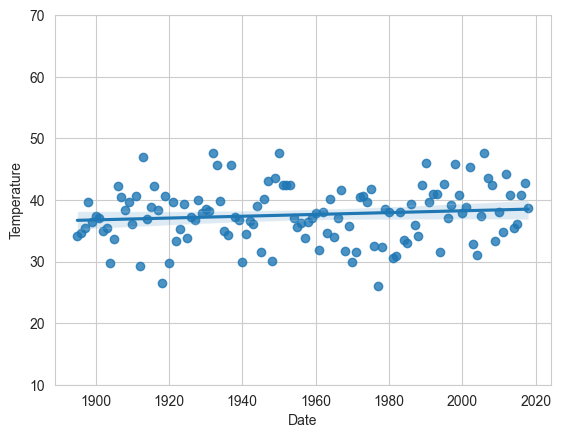

In [104]:
# Create scatter plot
sns.set_style('whitegrid')

# set axes
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)

# Limit Y axis
axes.set_ylim(10,70)

## Part 3: Prediction (Training a Model)

### Section 1: Build the Model

In [105]:
# Split data into parts for training and testing
X_train, X_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1,1), nyc.Temperature.values, random_state=11)

# Check shape of x train
X_train.shape


(93, 1)

In [106]:
# Check shape of x test
X_test.shape

(31, 1)

In [107]:
# Create linear regression estimator
linear_regression = LinearRegression()

# Train linear regression estimator
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [108]:
# Coeff attribute
linear_regression.coef_

array([0.01939167])

In [109]:
# Intercept attribute
linear_regression.intercept_

np.float64(-0.30779820252656975)

### Section 2: Test the Model

In [110]:
# Predicted variable
predicted = linear_regression.predict(X_test)

# Expected variable
expected = y_test

# Test the Model
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Section 3: Predict

In [111]:
# Set predict function to y = mx+b to predict average temps
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

# Predict Temp for 2019
predict(2019)

array([38.84399018])

In [112]:
# Predict Temp for 1890
predict(1890)

array([36.34246432])

In [113]:
# Predict Temp for 2024
predict(2024)

array([38.94094855])

### Section 4: Visualizations

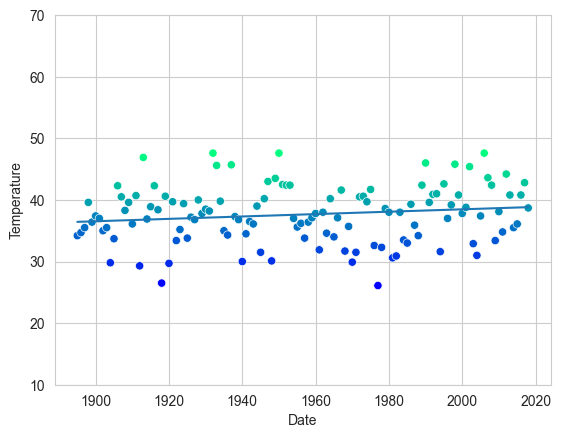

In [114]:
# Set axes function with scatterplot
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)

# limt y axis
axes.set_ylim(10, 70)

# Pass array through x coordinates
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

# Set y coordinates
y = predict(x)

# Display line plot
line = plt.plot(x, y)

## Part 4: Insights
**-Trending Upwards:** Both models show an positive trend in higher temps over time. The data also supports this with the recorded data from 1895 to 2018.

**-Increase Insights:** While it is not a drastic increase, both models it is steadily increasing from a little above 36 in 1890 to 38.94 in 2024.

**-Reason for Increase:** We can expect average temperatures to keep rising. This is most likely due to climate change over the past few centuries with Industrialization.

Overall analysis concludes that average January high temps in NYC will continue to rise. The linear regression model and machine learning model supports this